In [ ]:
# Importing Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [ ]:
# Designing FNN model
class FNN(nn.Module):
    def __init__(self):
        super(FNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 32)
        self.fc6 = nn.Linear(32, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = self.fc6(x)
        return x

# Computational Graph

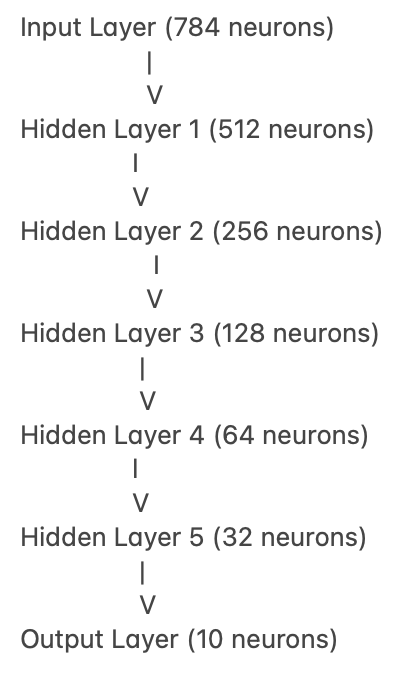

This is a Fully Connected Neural Network (FNN) model

Input Layer: The input to the network is a flattened version of a 28x28 pixel image, so there are 784 (28*28) input neurons.

Hidden Layers: There are five hidden layers in this network:

The first hidden layer (fc1) has 512 neurons.
The second hidden layer (fc2) has 256 neurons.
The third hidden layer (fc3) has 128 neurons.
The fourth hidden layer (fc4) has 64 neurons.
The fifth hidden layer (fc5) has 32 neurons.

Output Layer: The output layer (fc6) has 10 neurons, representing the 10 classes (0 to 9) in the MNIST dataset.

Activation Function: The activation function used between each layer is ReLU (Rectified Linear Unit).



In [ ]:
# loading data and preprocessing
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 109013588.10it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 23784742.55it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 30791762.30it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4662390.79it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch [1/10], Training Loss: 1.39398
Epoch [1/10], Test Loss: 0.25270
Epoch [2/10], Training Loss: 0.19164
Epoch [2/10], Test Loss: 0.13176
Epoch [3/10], Training Loss: 0.11142
Epoch [3/10], Test Loss: 0.12857
Epoch [4/10], Training Loss: 0.07450
Epoch [4/10], Test Loss: 0.09433
Epoch [5/10], Training Loss: 0.05699
Epoch [5/10], Test Loss: 0.08196
Epoch [6/10], Training Loss: 0.04623
Epoch [6/10], Test Loss: 0.09489
Epoch [7/10], Training Loss: 0.03390
Epoch [7/10], Test Loss: 0.07312
Epoch [8/10], Training Loss: 0.02613
Epoch [8/10], Test Loss: 0.08464
Epoch [9/10], Training Loss: 0.02386
Epoch [9/10], Test Loss: 0.08611
Epoch [10/10], Training Loss: 0.01778
Epoch [10/10], Test Loss: 0.09578
Training is completed for the Model


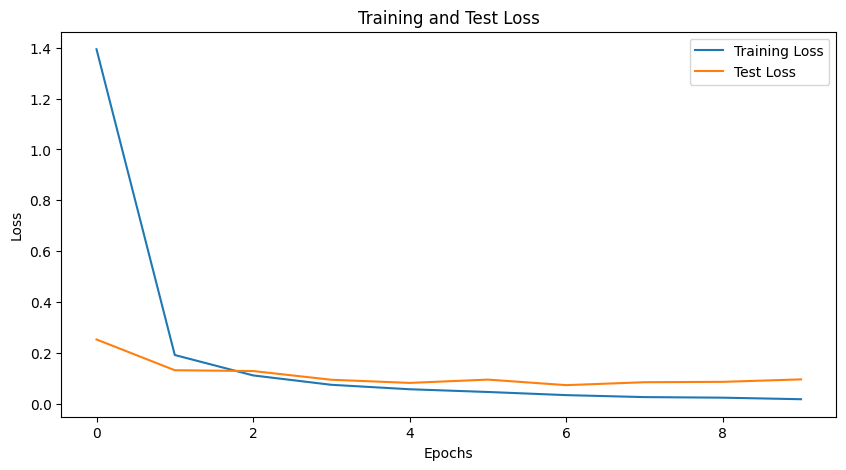

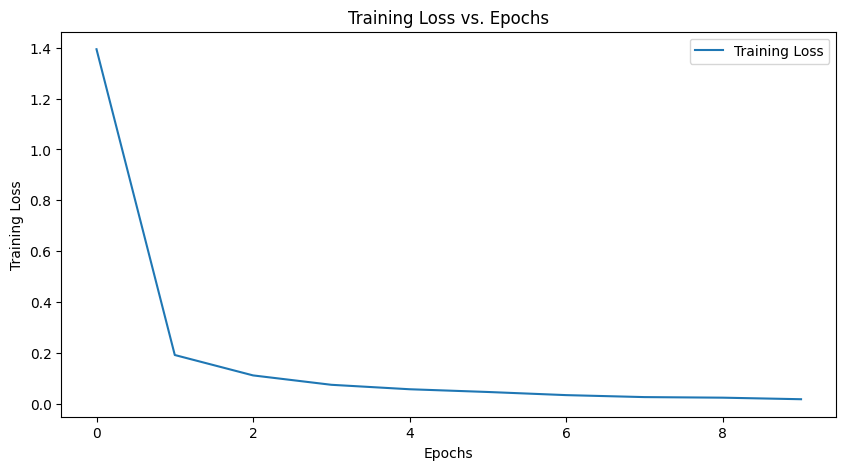

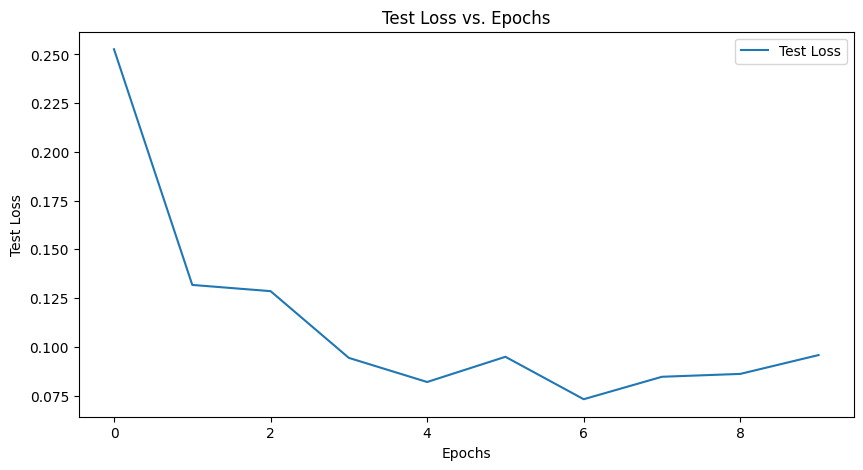

In [ ]:

# Model, criterion, and optimizer initialization
model = FNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

train_losses = []
test_losses = []

# Training
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(trainloader))
    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {running_loss / len(trainloader):.5f}')

    # Validation
    test_loss = 0.0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
    test_losses.append(test_loss / len(testloader))
    print(f'Epoch [{epoch + 1}/{num_epochs}], Test Loss: {test_loss / len(testloader):.5f}')


print('Training is completed for the Model')

# Plotting the train and test losses
plt.figure(figsize=(10,5))
plt.title("Training and Test Loss")
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.title("Training Loss vs. Epochs")
plt.plot(train_losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.title("Test Loss vs. Epochs")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Test Loss")
plt.legend()
plt.show()
